Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
first five rows of data:
 [[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]


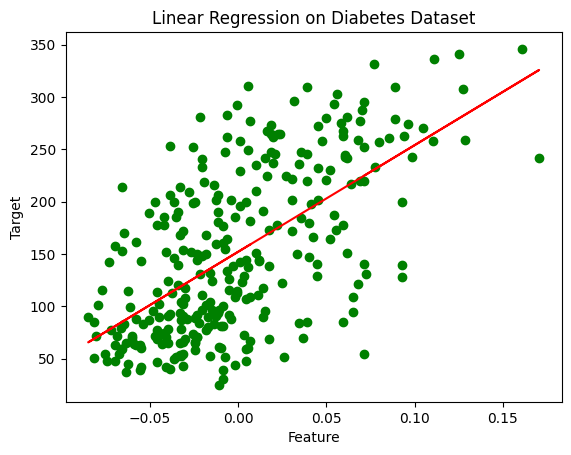

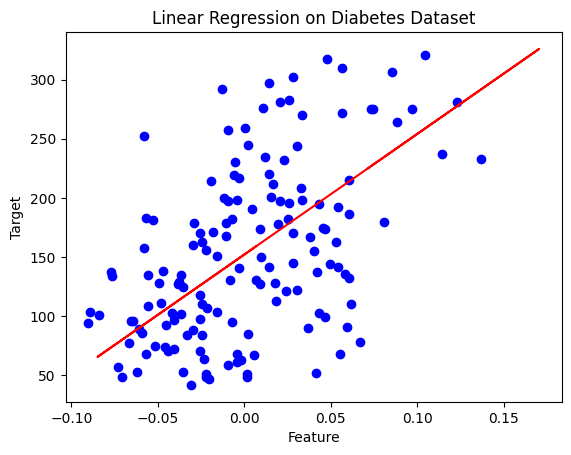

Coefficients: [1018.73538781]
Intercept: 152.14519748803136
Mean Squared Error: 3952.5237308667597
Coefficient of Determination (R^2 Score): 0.24353975013465823


In [1]:
import numpy as np
import matplotlib.pyplot as mtp
import pandas as pd
from sklearn import datasets, linear_model
diabetes = datasets.load_diabetes()
print ("Feature names:",diabetes['feature_names'])
print("first five rows of data:\n",diabetes['data'][:5])


x = diabetes.data[:, np.newaxis, 2]
y = diabetes.target # define the target variable (dependent variable) as y
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0)



from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)



y_pred= regressor.predict(x_test)
x_pred= regressor.predict(x_train)



mtp.scatter(x_train, y_train, color="green")
mtp.plot(x_train, x_pred, color="red")
mtp.title("Linear Regression on Diabetes Dataset")
mtp.xlabel("Feature")
mtp.ylabel("Target")
mtp.show()



mtp.scatter(x_test, y_test, color="blue")
mtp.plot(x_train, x_pred, color="red")
mtp.title("Linear Regression on Diabetes Dataset")
mtp.xlabel("Feature")
mtp.ylabel("Target")
mtp.show()



print('Coefficients:', regressor.coef_)
print('Intercept:', regressor.intercept_)


from sklearn.metrics import mean_squared_error, r2_score
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))


print('Coefficient of Determination (R^2 Score):', r2_score(y_test, y_pred))


Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
First five rows of data:
 [[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]


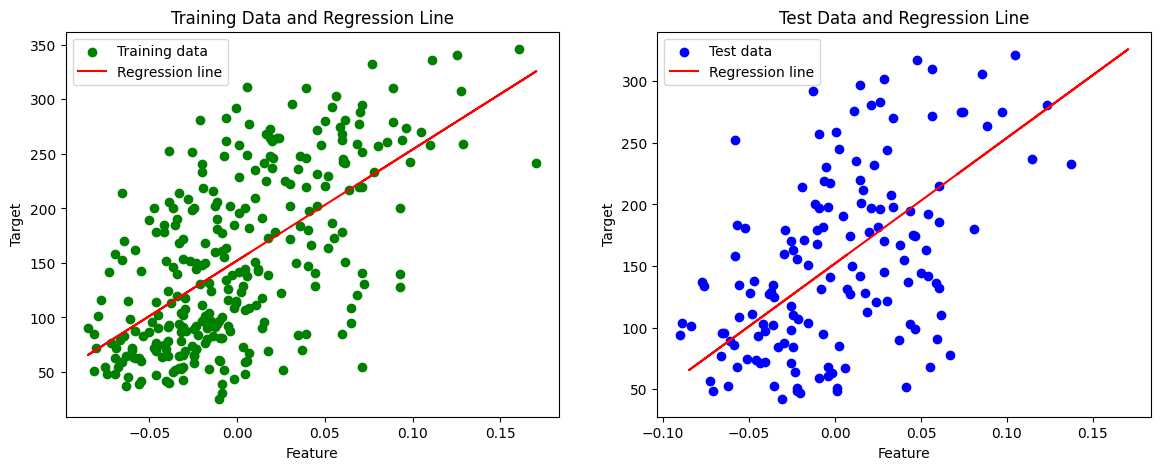

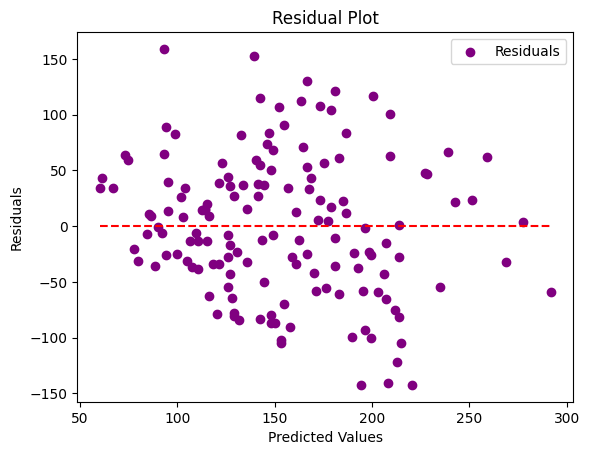

Coefficients: [1018.73538781]
Intercept: 152.14519748803136
Mean Squared Error (Test set): 3952.5237308667597
Coefficient of Determination (R^2 Score, Test set): 0.24353975013465823
Cross-validated R^2 Score: 0.3244472711845637


In [2]:
import numpy as np
import matplotlib.pyplot as mtp
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
diabetes = datasets.load_diabetes()
print("Feature names:", diabetes['feature_names'])
print("First five rows of data:\n", diabetes['data'][:5])

# Define feature and target
x = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

# Split dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

# Initialize and fit the model
regressor = linear_model.LinearRegression()
regressor.fit(x_train, y_train)

# Predict
y_pred_train = regressor.predict(x_train)
y_pred_test = regressor.predict(x_test)

# Plot Training Data and Regression Line
mtp.figure(figsize=(14, 5))

# Training data
mtp.subplot(1, 2, 1)
mtp.scatter(x_train, y_train, color="green", label="Training data")
mtp.plot(x_train, y_pred_train, color="red", label="Regression line")
mtp.title("Training Data and Regression Line")
mtp.xlabel("Feature")
mtp.ylabel("Target")
mtp.legend()

# Test data
mtp.subplot(1, 2, 2)
mtp.scatter(x_test, y_test, color="blue", label="Test data")
mtp.plot(x_train, y_pred_train, color="red", label="Regression line")
mtp.title("Test Data and Regression Line")
mtp.xlabel("Feature")
mtp.ylabel("Target")
mtp.legend()

mtp.show()

# Residual plot
residuals = y_test - y_pred_test
mtp.figure()
mtp.scatter(y_pred_test, residuals, color='purple', label='Residuals')
mtp.hlines(y=0, xmin=min(y_pred_test), xmax=max(y_pred_test), colors='red', linestyles='dashed')
mtp.title('Residual Plot')
mtp.xlabel('Predicted Values')
mtp.ylabel('Residuals')
mtp.legend()
mtp.show()

# Print coefficients and performance metrics
print('Coefficients:', regressor.coef_)
print('Intercept:', regressor.intercept_)
print('Mean Squared Error (Test set):', mean_squared_error(y_test, y_pred_test))
print('Coefficient of Determination (R^2 Score, Test set):', r2_score(y_test, y_pred_test))

# Optional: Cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(regressor, x, y, cv=5)
print('Cross-validated R^2 Score:', np.mean(cv_scores))
